<a href="https://colab.research.google.com/github/Michael-ozenua090/Michael-ozenua090/blob/main/NCS_Oyo_Workshop_ML_Deployment_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Importation of Required Libraries

In [ ]:
import pandas as pd  # Importing pandas library and aliasing it as pd
import numpy as np  # Importing numpy library and aliasing it as np
from matplotlib import pyplot as plt  # Importing pyplot module from matplotlib library and aliasing it as plt
import os  # Importing os module for operating system dependent functionality
import seaborn as sns  # Importing seaborn library and aliasing it as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)   # Setting pandas option to display all columns in DataFrame
plt.style.use('ggplot')  # Setting plot style to 'ggplot' from matplotlib

## Donwload Dataset

In [ ]:
# Download Dataset from google drive
print("Downloading Dataset...\n")
!gdown --id 1nRTugJOE9_6qfWze1-Ha4kIitzHbeg6m -O /content/cleaned_jiji_cars.csv

# Unzip the dataset
print("Download Complete!")


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nRTugJOE9_6qfWze1-Ha4kIitzHbeg6m
To: /content/cleaned_jiji_cars.csv
100% 1.47M/1.47M [00:00<00:00, 155MB/s]
Download Complete!


##  Reading CSV files into pandas DataFrames


In [ ]:
df = pd.read_csv('cleaned_jiji_cars.csv')  # Reading data from csv into DataFrame

df.head()  # Displaying the first few rows of the DataFrame

,price,vehicle_transmission,item_condition,fuel_type,promoted,make,model,yer_of_manufacture,body,drivetrain,engine_size(cc),no_of_clinders,hp,color,interior_color,seats,registered_car,exchange_possible,airbags,armrests,electric mirrors,cup holders,winch,car play,traction control,am/fm radio,air conditioning,anti-lock brakes,led headlights,blind spot monitor,sidesteps,front fog lamps,parking sensors,spotlight,cd player,android auto,cruise control,electric windows,sunroof,parking assist,xenon lights,bullbar,alloy wheels,leather seats,roof rack,First registration,Original parts,Need repair,First owner,After crash,Need repainting,Unpainted,No faults,Wiring problems,City,Location
0,"₦10,000,000",Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2005.0,Sedan,Front,2400,4.0,160,Gold,Brown,5,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Lagos,Lekki
1,"₦16,000,000",Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2012.0,Sedan,Front,2500,4.0,178,Red,Black,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Lagos,Amuwo-Odofin
2,"₦161,500,000",Automatic,Foreign Used,Petrol,Not promoted,Toyota,Tundra,2023.0,SUV,All Wheel,3500,5.0,288,Black,Beige,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,Lagos,Amuwo-Odofin
3,"₦11,500,000",Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2011.0,Sedan,Front,2500,4.0,179,Red,Black,5,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Lagos,Amuwo-Odofin
4,"₦13,500,000",Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2013.0,Sedan,Front,2500,4.0,178,Gray,Black,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Lagos,Amuwo-Odofin


# Data Cleaning

## Remoning Duplicated Ros

In [ ]:
# print size of data before dropping duplicates
print(f'Size of data before dropping duplicates: {df.shape[0]}')

# Drop duplicate rows
df = df.loc[~df.duplicated(subset = df.columns.difference(['price']))]

# print size of data after dropping duplicates
print(f'Size of data after dropping duplicates: {df.shape[0]}')
df

Size of data before dropping duplicates: 5670
Size of data after dropping duplicates: 4797


,price,vehicle_transmission,item_condition,fuel_type,promoted,make,model,yer_of_manufacture,body,drivetrain,engine_size(cc),no_of_clinders,hp,color,interior_color,seats,registered_car,exchange_possible,airbags,armrests,electric mirrors,cup holders,winch,car play,traction control,am/fm radio,air conditioning,anti-lock brakes,led headlights,blind spot monitor,sidesteps,front fog lamps,parking sensors,spotlight,cd player,android auto,cruise control,electric windows,sunroof,parking assist,xenon lights,bullbar,alloy wheels,leather seats,roof rack,First registration,Original parts,Need repair,First owner,After crash,Need repainting,Unpainted,No faults,Wiring problems,City,Location
0,"₦10,000,000",Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2005.0,Sedan,Front,2400,4.0,160,Gold,Brown,5,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Lagos,Lekki
1,"₦16,000,000",Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2012.0,Sedan,Front,2500,4.0,178,Red,Black,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Lagos,Amuwo-Odofin
2,"₦161,500,000",Automatic,Foreign Used,Petrol,Not promoted,Toyota,Tundra,2023.0,SUV,All Wheel,3500,5.0,288,Black,Beige,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,Lagos,Amuwo-Odofin
3,"₦11,500,000",Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2011.0,Sedan,Front,2500,4.0,179,Red,Black,5,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Lagos,Amuwo-Odofin
4,"₦13,500,000",Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2013.0,Sedan,Front,2500,4.0,178,Gray,Black,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Lagos,Amuwo-Odofin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,"₦17,000,000",Automatic,Foreign Used,Petrol,Not promoted,Mercedes-Benz,GLK-Class,2012.0,SUV,All Wheel,3500,7.0,298,Silver,Black,6,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,Lagos,Apapa
5665,"₦28,000,000",Automatic,Foreign Used,Petrol,Not promoted,Toyota,RAV4,2017.0,SUV,All Wheel,2500,4.0,292,Gray,Other,5,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No,Lagos,Apapa
5667,"₦87,000,000",Automatic,Foreign Used,Petrol,Not promoted,Toyota,Highlander,2022.0,SUV,All Wheel,3500,5.0,285,White,Brown,5,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No,Lagos,Apapa
5668,"₦28,500,000",Automatic,Foreign Used,Petrol,Not promoted,Mercedes-Benz,GLA 250,2017.0,SUV,All Wheel,3500,7.0,269,Blue,Black,7,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,Yes,No,Lagos,Apapa


## Cleaning the "Price' Column

In [ ]:
# Removing naira sign (₦) and commas from 'price' column

df['price'] = df['price'].str.replace('₦', '').str.replace(',', '')  # Removing naira sign and commas from 'price' column

# Converting the price values to integers

df['price'] = df['price'].astype(float)  # Converting 'price' column values to float type

df.head()  # Displaying the DataFrame after modifications

,price,vehicle_transmission,item_condition,fuel_type,promoted,make,model,yer_of_manufacture,body,drivetrain,engine_size(cc),no_of_clinders,hp,color,interior_color,seats,registered_car,exchange_possible,airbags,armrests,electric mirrors,cup holders,winch,car play,traction control,am/fm radio,air conditioning,anti-lock brakes,led headlights,blind spot monitor,sidesteps,front fog lamps,parking sensors,spotlight,cd player,android auto,cruise control,electric windows,sunroof,parking assist,xenon lights,bullbar,alloy wheels,leather seats,roof rack,First registration,Original parts,Need repair,First owner,After crash,Need repainting,Unpainted,No faults,Wiring problems,City,Location
0,10000000.0,Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2005.0,Sedan,Front,2400,4.0,160,Gold,Brown,5,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Lagos,Lekki
1,16000000.0,Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2012.0,Sedan,Front,2500,4.0,178,Red,Black,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Lagos,Amuwo-Odofin
2,161500000.0,Automatic,Foreign Used,Petrol,Not promoted,Toyota,Tundra,2023.0,SUV,All Wheel,3500,5.0,288,Black,Beige,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,Lagos,Amuwo-Odofin
3,11500000.0,Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2011.0,Sedan,Front,2500,4.0,179,Red,Black,5,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Lagos,Amuwo-Odofin
4,13500000.0,Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2013.0,Sedan,Front,2500,4.0,178,Gray,Black,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Lagos,Amuwo-Odofin


## Investigating data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4797 entries, 0 to 5669
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 4797 non-null   float64
 1   vehicle_transmission  4797 non-null   object 
 2   item_condition        4797 non-null   object 
 3   fuel_type             4797 non-null   object 
 4   promoted              4797 non-null   object 
 5   make                  4797 non-null   object 
 6   model                 4797 non-null   object 
 7   yer_of_manufacture    4797 non-null   float64
 8   body                  4797 non-null   object 
 9   drivetrain            4797 non-null   object 
 10  engine_size(cc)       4797 non-null   int64  
 11  no_of_clinders        4797 non-null   float64
 12  hp                    4797 non-null   int64  
 13  color                 4797 non-null   object 
 14  interior_color        4797 non-null   object 
 15  seats                 4797

The "seats" column should be represented as an integer as it should contain the number of seats in the vehicle.

### Investigating the seats column

In [ ]:
# check all value of "seats" column and show the rows those that can't be converted to integer
df[df['seats'].apply(lambda x: not x.isnumeric())]

# print all unique "seats" values
df['seats'].unique()

array(['5', '6', '8', '4', '7', '7-8', '7 or 8', '2', '3', '5-7',
       '5 or 6'], dtype=object)

### Correcting the abnormal "seats" values.
The approach used here is by choosing the maximum number.



In [ ]:
# replace the special "seats" values with preferred numeric representative

mapping_dict = {"7-8": 8,
                "5-7":7,
                "7 or 8": 8,
                "5 or 6": 6}

df["seats"].replace(mapping_dict, inplace=True)

# convert the "seats" column to integer type
df["seats"] = df["seats"].astype(int)

### Missing values Check

In [ ]:
# Counting missing values in each column
missing_values_count = df.isnull().sum()

# Calculating the proportion of missing values for each column
missing_values_proportion= df.isnull().sum() / len(df)

# Combining count and proportion into one DataFrame for a clean summary
missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Proportion': missing_values_proportion
})
# Displaying the summary table
print(missing_values_summary)

                      Missing Values  Proportion
price                              0         0.0
vehicle_transmission               0         0.0
item_condition                     0         0.0
fuel_type                          0         0.0
promoted                           0         0.0
make                               0         0.0
model                              0         0.0
yer_of_manufacture                 0         0.0
body                               0         0.0
drivetrain                         0         0.0
engine_size(cc)                    0         0.0
no_of_clinders                     0         0.0
hp                                 0         0.0
color                              0         0.0
interior_color                     0         0.0
seats                              0         0.0
registered_car                     0         0.0
exchange_possible                  0         0.0
airbags                            0         0.0
armrests            

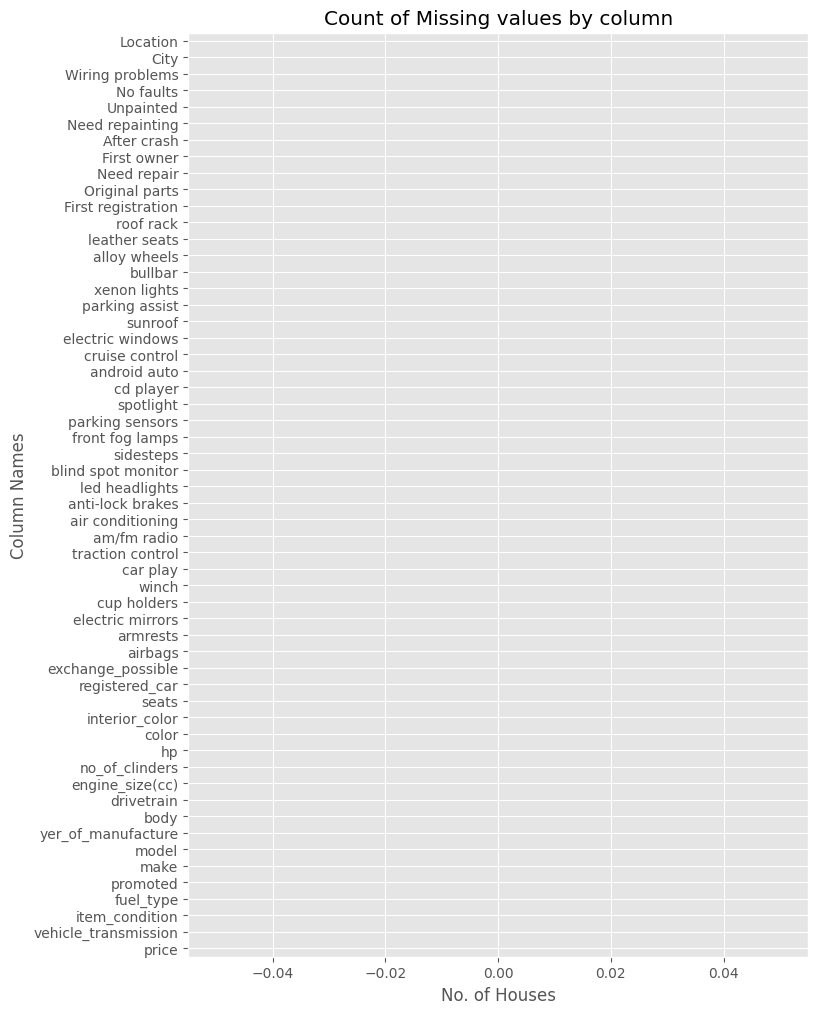

In [ ]:
# Check for missing values and plot the count of missing values by column
df.isnull().sum().plot(kind='barh', figsize=(8, 12))

# Set the title of the plot
plt.title('Count of Missing values by column')
plt.xlabel('No. of Houses')
plt.ylabel('Column Names')

# Show the plot
plt.show()

In [ ]:
df

,price,vehicle_transmission,item_condition,fuel_type,promoted,make,model,yer_of_manufacture,body,drivetrain,engine_size(cc),no_of_clinders,hp,color,interior_color,seats,registered_car,exchange_possible,airbags,armrests,electric mirrors,cup holders,winch,car play,traction control,am/fm radio,air conditioning,anti-lock brakes,led headlights,blind spot monitor,sidesteps,front fog lamps,parking sensors,spotlight,cd player,android auto,cruise control,electric windows,sunroof,parking assist,xenon lights,bullbar,alloy wheels,leather seats,roof rack,First registration,Original parts,Need repair,First owner,After crash,Need repainting,Unpainted,No faults,Wiring problems,City,Location
0,10000000.0,Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2005.0,Sedan,Front,2400,4.0,160,Gold,Brown,5,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Lagos,Lekki
1,16000000.0,Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2012.0,Sedan,Front,2500,4.0,178,Red,Black,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Lagos,Amuwo-Odofin
2,161500000.0,Automatic,Foreign Used,Petrol,Not promoted,Toyota,Tundra,2023.0,SUV,All Wheel,3500,5.0,288,Black,Beige,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,Lagos,Amuwo-Odofin
3,11500000.0,Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2011.0,Sedan,Front,2500,4.0,179,Red,Black,5,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Lagos,Amuwo-Odofin
4,13500000.0,Automatic,Foreign Used,Petrol,Not promoted,Toyota,Camry,2013.0,Sedan,Front,2500,4.0,178,Gray,Black,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Lagos,Amuwo-Odofin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,17000000.0,Automatic,Foreign Used,Petrol,Not promoted,Mercedes-Benz,GLK-Class,2012.0,SUV,All Wheel,3500,7.0,298,Silver,Black,6,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,Lagos,Apapa
5665,28000000.0,Automatic,Foreign Used,Petrol,Not promoted,Toyota,RAV4,2017.0,SUV,All Wheel,2500,4.0,292,Gray,Other,5,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No,Lagos,Apapa
5667,87000000.0,Automatic,Foreign Used,Petrol,Not promoted,Toyota,Highlander,2022.0,SUV,All Wheel,3500,5.0,285,White,Brown,5,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No,Lagos,Apapa
5668,28500000.0,Automatic,Foreign Used,Petrol,Not promoted,Mercedes-Benz,GLA 250,2017.0,SUV,All Wheel,3500,7.0,269,Blue,Black,7,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,Yes,No,Lagos,Apapa


## Dropping Redundant Columns

In [ ]:
# make list of  redundant columns
drop_cols = ["promoted","Location","City", "exchange_possible"]

# drop redundant columns
df.drop(drop_cols, axis=1, inplace=True)

## Exploring Categorical Columns and Filling Missing Values


In [ ]:
# Defining unique categorical columns
categorical_columns = ['vehicle_transmission', 'item_condition', 'fuel_type', 'make', 'model',
       'body', 'drivetrain', 'color', 'interior_color',
       'registered_car', 'airbags', 'armrests', 'electric mirrors',
       'cup holders', 'winch', 'car play', 'traction control', 'am/fm radio',
       'air conditioning', 'anti-lock brakes', 'led headlights',
       'blind spot monitor', 'sidesteps', 'front fog lamps', 'parking sensors',
       'spotlight', 'cd player', 'android auto', 'cruise control',
       'electric windows', 'sunroof', 'parking assist', 'xenon lights',
       'bullbar', 'alloy wheels', 'leather seats', 'roof rack',
       'First registration', 'Original parts', 'Need repair', 'First owner',
       'After crash', 'Need repainting', 'Unpainted', 'No faults',
       'Wiring problems']

# Filling missing values in categorical columns with 'Unknown'
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Data Preprocessing

### Handling Rare Categorical Features

In [ ]:
MIN_FREQ = 10

for col in  categorical_columns:
    # Filtering out top categories based on minimum frequency
    top_categories = (df[col].value_counts() >= MIN_FREQ).index.values.tolist()

    # Replacing categories not in top categories with 'other'
    df.loc[~df[col].isin(top_categories), col] = 'other'



## One-Hot Encoding Categorical Features

In [ ]:
dummy_df = pd.get_dummies(df , columns = categorical_columns)

dummy_df

,price,yer_of_manufacture,engine_size(cc),no_of_clinders,hp,seats,vehicle_transmission_AMT,vehicle_transmission_Automatic,vehicle_transmission_CVT,vehicle_transmission_Manual,item_condition_Brand New,item_condition_Foreign Used,item_condition_Local Used,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Petrol,make_Acura,make_Audi,make_BMW,make_Bentley,make_Chevrolet,make_Chrysler,make_Citroen,make_Dodge,make_Ford,make_GMC,make_Genesis,make_Honda,make_Hyundai,make_Infiniti,make_JAC,make_Jeep,make_Kia,make_Land Rover,make_Lexus,make_Lincoln,make_Mazda,make_Mercedes-Benz,make_Mitsubishi,make_Nissan,make_Peugeot,make_Polaris,make_Pontiac,make_Renault,make_Scion,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,model_207,model_280E,model_300,model_328i,model_4-Runner,model_406,model_523i,model_528i,model_535i,model_Accord,model_Accord Crosstour,model_Allex,model_Alphard,model_Altima,model_Armada,model_Avalon,model_Avensis,model_Beetle,model_C-Class,model_C-HR,model_C230,model_C250,model_C300,model_C43,model_C450,model_C63,model_CLA-Class,model_CR-V,model_CX-9,model_Camaro,model_Camry,model_Caravell,model_Civic,model_Corolla,model_Corolla Verso,model_Cruze,model_DS,model_E300,model_E350,model_E400,model_E450,model_ES,model_Edge,model_Elantra,model_Element,model_Escape,model_Every Wagon,model_F-150,model_FX35,model_Focus,model_Fortuner,model_Frontier,model_G80,model_GL-Class,model_GLA 250,model_GLA-Class,model_GLB-Class,model_GLC-Class,model_GLE-Class,model_GLE43,model_GLK-Class,model_GLS-Class,model_GS,model_GX,model_Galaxy,model_Genesis,model_Golf,model_HiAce,model_Highlander,model_Hilux,model_ILX,model_IS,model_L200,model_LS,model_LX,model_Land Cruiser,model_Land Cruiser Prado,model_Lutecia,model_M,model_M Class,model_MDX,model_MKZ,model_Mulsanne,model_NX,model_Odyssey,model_Pajero,model_Passat,model_Pathfinder,model_Pilot,model_QX4,model_QX80,model_R-Class,model_RAM,model_RAV4,model_RC,model_RDX,model_RX,model_RX 330,model_RX 350,model_Range Rover,model_Range Rover Sport,model_Ranger,model_Ridgeline,model_Rush,model_S-Class,model_S8,model_SC-Class,model_Santa Fe,model_Sequoia,model_Sharan,model_Sienna,model_Sienta,model_Slingshot,model_Sonata,model_Sorento,model_Soul,model_Spectra,model_T6,model_Tacoma,model_Titan,model_TownAce,model_Tribeca,model_Tundra,model_Venza,model_Vibe,model_Wrangler,model_X6,model_X7,model_XC60,model_XC90,model_Yaris,model_Yukon,model_Z3,model_ZDX,model_tC,model_xB,body_Convertible,body_Coupe,body_Crossover,body_Hatchback,body_Minivan,body_Pickup,body_SUV,body_Sedan,body_Station Wagon,drivetrain_4x2,drivetrain_4x4,drivetrain_All Wheel,drivetrain_Four Wheel,drivetrain_Front,drivetrain_Front Wheel,drivetrain_Rear Wheel,color_Beige,color_Black,color_Blue,color_Brown,color_Burgundy,color_Gold,color_Gray,color_Green,color_Ivory,color_Matt Black,color_Off white,color_Orange,color_Other,color_Pearl,color_Pink,color_Purple,color_Red,color_Silver,color_Teal,color_White,color_Yellow,interior_color_Beige,interior_color_Black,interior_color_Blue,interior_color_Brown,interior_color_Gray,interior_color_Green,interior_color_Orange,interior_color_Other,interior_color_Purple,interior_color_Red,interior_color_Violet,interior_color_White,registered_car_No,registered_car_Yes,airbags_No,airbags_Yes,armrests_No,armrests_Yes,electric mirrors_No,electric mirrors_Yes,cup holders_No,cup holders_Yes,winch_No,winch_Yes,car play_No,car play_Yes,traction control_No,traction control_Yes,am/fm radio_No,am/fm radio_Yes,air conditioning_No,air conditioning_Yes,anti-lock brakes_No,anti-lock brakes_Yes,led headlights_No,led headlights_Yes,blind spot monitor_No,blind spot monitor_Yes,sidesteps_No,sidesteps_Yes,front fog lamps_No,front fog lamps_Yes,parking sensors_No,parking sensors_Yes,spotlight_No,spotlight_Yes,cd player_No,cd player_Yes,android auto_No,android auto_Yes,cruise control_No,cruise control_Yes,electric windows_No,electric windows_Yes,sunroof_No,sunroof_Yes,parking assist_No,parking assist_Yes,xenon lights_No,xenon ligh

## Data Preprocessing and Feature Selection


In [ ]:
# Define columns to drop
drop_columns = ['price']

# Select main columns by excluding columns in drop_columns
main_cols = dummy_df.columns.difference(drop_columns)

# Select features (X) and target variable (y)
X = dummy_df[main_cols]
y = dummy_df['price']


# Modeling and Evaluation

## Importing necessary libraries

In [ ]:
# Importing required libraries
from sklearn.ensemble import RandomForestRegressor  # For RandomForestRegressor model
from xgboost import XGBRegressor  # For XGBRegressor model
from sklearn.linear_model import LinearRegression  # For LinearRegression model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score  # For train-test split and cross-validation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluation metrics
import random  # For generating random numbers
import os  # For operating system dependent functionality

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Set the test size to 30% of the data and enable shuffling
test_size = 0.30
shuffle = True

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state = 12)

## XGBoost

In [ ]:
xgb = XGBRegressor(n_estimators=550, max_depth=4, learning_rate=0.08, colsample_bytree=0.6, verbosity=0,
                   random_state=12, subsample=0.8)  # Initializing XGBRegressor model
xgb.fit(X_train, y_train)  # Fitting the model on training data
preds = xgb.predict(X_test)  # Making predictions on test data

# Evaluating the model on the test set
def compute_metrics(y_test, preds, model_name):
    rmse = mean_squared_error(y_test, preds, squared=False)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print(f"{model_name} Metrics:")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")

compute_metrics(y_test, preds, 'XGBoost')

XGBoost Metrics:
Root Mean Squared Error (RMSE): 7047536.428740343
Mean Absolute Error (MAE): 3540639.1469251844
R-squared (R2): 0.8611970051667822


## Models Feature Importances

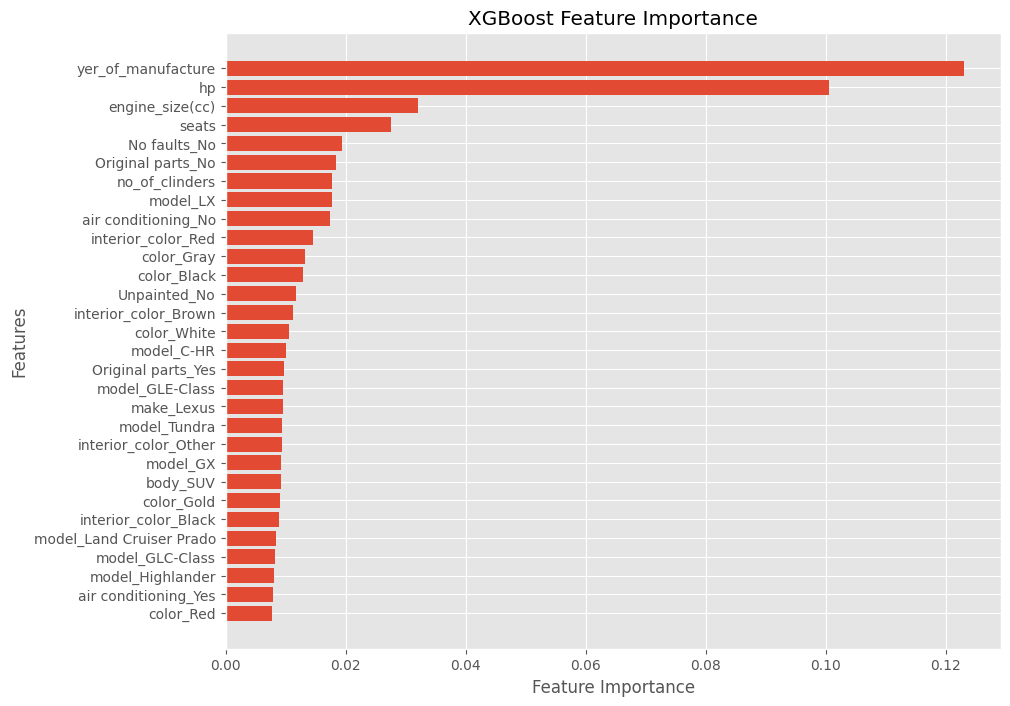

In [ ]:
def plot_xgboost_feature_importance(xgb_model, importance_type='weight', figsize=(10, 8),n = 30):
    """
    Plot feature importance for an XGBoost model.

    Parameters:
    xgb_model (xgboost.XGBModel): The trained XGBoost model.
    importance_type (str): Type of feature importance to plot. Default is 'weight'.
    figsize (tuple): Figure size for the plot. Default is (10, 6).
    n(int): Number of features to display
    """

    # Extract feature importance
    importance = xgb_model.get_booster().get_score(importance_type=importance_type)

    # Normalize importance scores
    total = sum(importance.values())
    for key in importance:
        importance[key] /= total

    # Sort the importance dictionary by values
    sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=False)

    # Plotting feature importance
    features, scores = zip(*sorted_importance[-n:])
    plt.figure(figsize=figsize)
    plt.barh(range(len(features)), scores, align='center')
    plt.yticks(range(len(features)), features)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('XGBoost Feature Importance')
    plt.show()

plot_xgboost_feature_importance(xgb)

# Preparation for deployment: Saving models and categories

In [ ]:
import joblib

# Save the XGBoost model to a file
joblib.dump(xgb, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [ ]:
import json

# Assuming your DataFrame is named 'df'
# Generate dictionary to store unique values for each categorical column
categories_dict = {}
for col in categorical_columns:
    categories_dict[col] = df[col].unique().tolist()

# Save dictionary to JSON file
with open('categories.json', 'w') as json_file:
    json.dump(categories_dict, json_file, indent=4)

# Deployment

## Installing Gradio


In [ ]:
!pip install gradio -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.8 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import joblib
import json

# Load the saved model and categories
model = joblib.load('xgboost_model.pkl')
with open('categories.json', 'r') as f:
    categories = json.load(f)

def preprocess_input(vehicle_transmission, item_condition, fuel_type, make, model_name,
                    year, body, drivetrain, engine_size, cylinders, hp, color,
                    interior_color, seats, registered_car):
    """Preprocess input data to match the model's expected format"""
    # Create a dictionary with the input values
    input_dict = {
        'yer_of_manufacture': float(year),
        'engine_size(cc)': int(engine_size),
        'no_of_clinders': float(cylinders),
        'hp': int(hp),
        'seats': int(seats),
        'vehicle_transmission': vehicle_transmission,
        'item_condition': item_condition,
        'fuel_type': fuel_type,
        'make': make,
        'model': model_name,
        'body': body,
        'drivetrain': drivetrain,
        'color': color,
        'interior_color': interior_color,
        'registered_car': registered_car
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([input_dict])

    # Create dummy variables for categorical columns
    categorical_columns = ['vehicle_transmission', 'item_condition', 'fuel_type', 'make',
                         'model', 'body', 'drivetrain', 'color', 'interior_color',
                         'registered_car']

    # One-hot encode categorical variables
    input_encoded = pd.get_dummies(input_df, columns=categorical_columns)

    # Ensure all columns from training are present
    for col in main_cols:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    # Reorder columns to match training data
    input_encoded = input_encoded[main_cols]

    return input_encoded

In [ ]:
def predict_price(vehicle_transmission, item_condition, fuel_type, make, model_name,
                 year, body, drivetrain, engine_size, cylinders, hp, color,
                 interior_color, seats, registered_car):
    """Predict car price based on input features"""
    # Preprocess input
    processed_input = preprocess_input(
        vehicle_transmission, item_condition, fuel_type, make, model_name,
        year, body, drivetrain, engine_size, cylinders, hp, color,
        interior_color, seats, registered_car
    )

    # Make prediction
    prediction = model.predict(processed_input)[0]

    # Format prediction as Nigerian Naira
    formatted_price = f"₦{prediction:,.2f}"

    return formatted_price

# Create Gradio interface
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Dropdown(choices=categories['vehicle_transmission'], label="Transmission"),
        gr.Dropdown(choices=categories['item_condition'], label="Condition"),
        gr.Dropdown(choices=categories['fuel_type'], label="Fuel Type"),
        gr.Dropdown(choices=categories['make'], label="Make"),
        gr.Dropdown(choices=categories['model'], label="Model"),
        gr.Number(minimum=1900, maximum=2024, label="Year of Manufacture"),
        gr.Dropdown(choices=categories['body'], label="Body Type"),
        gr.Dropdown(choices=categories['drivetrain'], label="Drivetrain"),
        gr.Number(minimum=500, maximum=10000, label="Engine Size (cc)"),
        gr.Number(minimum=2, maximum=12, label="Number of Cylinders"),
        gr.Number(minimum=50, maximum=1000, label="Horsepower"),
        gr.Dropdown(choices=categories['color'], label="Color"),
        gr.Dropdown(choices=categories['interior_color'], label="Interior Color"),
        gr.Number(minimum=2, maximum=8, label="Number of Seats"),
        gr.Dropdown(choices=categories['registered_car'], label="Registration Status")
    ],
    outputs=gr.Textbox(label="Predicted Price"),
    title="Nigerian Car Price Predictor",
    description="Enter the details of the car to get an estimated price in Nigerian Naira.",
    examples=[
        ["Automatic", "Foreign Used", "Petrol", "Toyota", "Camry", 2015, "Sedan",
         "FWD", 2500, 4, 178, "Black", "Black", 5, "Yes"],
        ["Automatic", "Foreign Used", "Petrol", "Mercedes-Benz", "GLE-Class", 2020,
         "SUV", "AWD", 3500, 6, 280, "White", "Brown", 7, "Yes"]
    ]
)

# Launch the app
iface.launch(debug = True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://0d0c028e0e18458e79.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
